=== NAVY MULTIPLEXING ===
FDM: Ship-to-ship HF radio (voice)
TDM: Sonar array data
WDM: Fiber optic ship networks


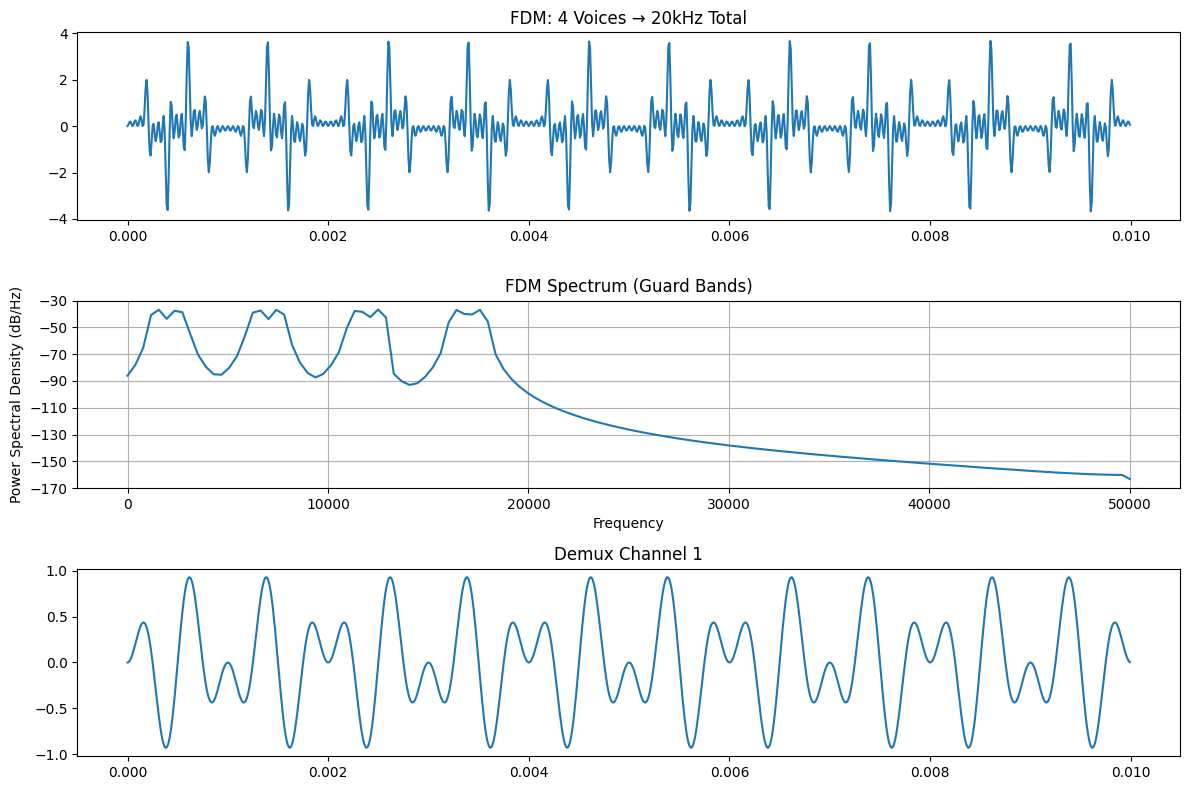

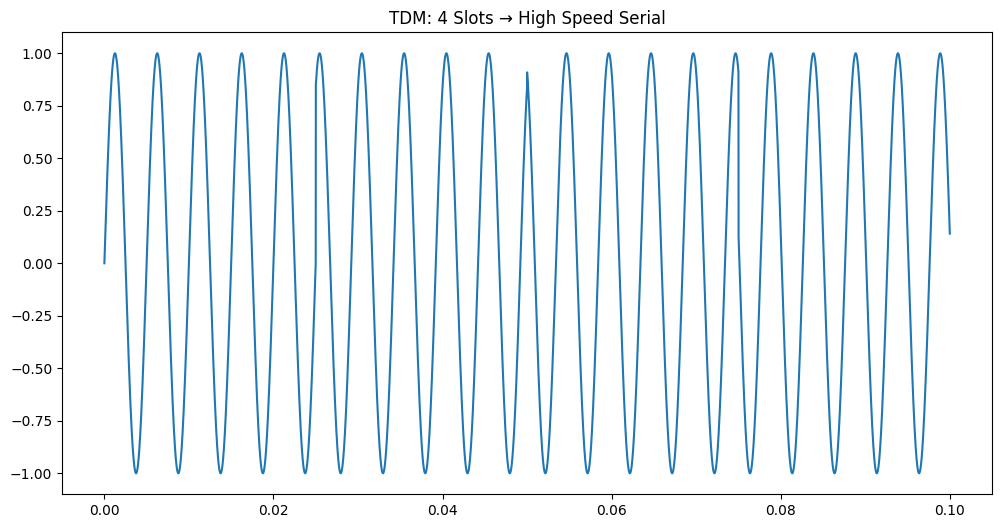

SSB Question: Why guard bands in FDM?


In [1]:
# Multiplexing_Demo.py - FDM/TDM/WDM for Navy SSB
import numpy as np
import matplotlib.pyplot as plt

def fdm_demo(num_channels=4, msg_bw=4):  # kHz
    """Frequency Division Multiplexing - Navy radio"""
    t = np.linspace(0, 0.1, 10000)
    
    # 4 voice channels at different carriers
    signals = []
    for i in range(num_channels):
        freq = (i*5 + 2) * 1000  # 2,7,12,17 kHz carriers
        sig = np.sin(2*np.pi*freq*t) * np.sin(2*np.pi*500*t)  # SSB
        signals.append(sig)
    
    fdm = np.sum(signals, axis=0)
    
    plt.figure(figsize=(12,8))
    plt.subplot(3,1,1); plt.plot(t[:1000], fdm[:1000]); plt.title('FDM: 4 Voices → 20kHz Total')
    plt.subplot(3,1,2); plt.psd(fdm, Fs=100000); plt.title('FDM Spectrum (Guard Bands)')
    plt.subplot(3,1,3); plt.plot(t[:1000], signals[0][:1000]); plt.title('Demux Channel 1')
    plt.tight_layout(); plt.show()

def tdm_demo(num_channels=4):
    """Time Division Multiplexing - Navy telemetry"""
    t_total = np.linspace(0, 0.1, 40000)
    slot_time = len(t_total) // num_channels
    
    tdm_signal = np.zeros_like(t_total)
    for i in range(num_channels):
        t_slot = np.linspace(0, 0.01, slot_time)
        msg = np.sin(2*np.pi*500*t_slot + i)  # Different messages
        start = i * slot_time
        tdm_signal[start:start+slot_time] = msg
    
    plt.figure(figsize=(12,6))
    plt.plot(t_total, tdm_signal); plt.title('TDM: 4 Slots → High Speed Serial')
    plt.show()

# Navy applications!
print("=== NAVY MULTIPLEXING ===")
print("FDM: Ship-to-ship HF radio (voice)")
print("TDM: Sonar array data")
print("WDM: Fiber optic ship networks")
fdm_demo(); tdm_demo()

print("SSB Question: Why guard bands in FDM?")
